In [61]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

In [62]:
driver = webdriver.Chrome()

In [63]:
url="https://www.starbucks.co.kr/store/store_map.do?disp=locale"

In [64]:
driver.get(url)

In [21]:
seoul_btn = '#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a'
sall_btn = '#mCSB_2_container > ul > li:nth-child(1) > a'

In [22]:
driver.find_element('css selector', seoul_btn).click()

In [23]:
driver.find_element('css selector',sall_btn).click()

In [24]:
#mCSB_3_container > ul > li:nth-child(1)
#mCSB_3_container > ul > li:nth-child(2)

In [25]:
html=driver.page_source

In [26]:
soup=BeautifulSoup(html,"html.parser")

In [44]:
starbucks_list=soup.select("#mCSB_3_container > ul > li")
starbucks_list

[<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>,
 <li class="quickResultLstCon" data-code="3672" data-hlytag="null" data-index="1" data-lat="37.510178" data-long="127.022223" data-name="논현역사거리" data-storecd="1434" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="논현역사거리" data-store="1434" data-yn="N">논현역사거리  </strong> <p class="result_details">서울특별시 강남구 강남대로 538 (논현동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>,
 <li class="quickResultLstCon" data-code="3858" data-hlytag="null" data-index="2" data-lat="37.5139309" data-long="127.0206057" data-name="신사역성일빌딩" data-storecd="1595" style="bac

In [28]:
len(starbucks_list)

613

In [29]:
starbucks_list_con=soup.select("li.quickResultLstCon")
len(starbucks_list_con)

613

In [30]:
starbucks_list[0]

<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>

In [31]:
starbucks_list[0].attrs["data-long"]

'127.043069'

In [32]:
starbucks_list[0].attrs["data-lat"]

'37.501087'

In [33]:
starbucks_list[0].select('strong')[0].string.strip()

'역삼아레나빌딩'

In [34]:
starbucks_list[0]

<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>

In [35]:
#for i in range(1,614):
    #print(starbucks_list[i].select('i'))
#string과 text는 모두 특정 태그로 감싸져있는 내용을 추출함 하지만 차이점이있는데 태그감싸져있는 부분 내에 다른 태그가 있는 경우 string()은 에러가 발생 => text가 보편적으로 더낫다


In [36]:
starbucks_list[0].select('i')[0].attrs['class'][0][4:] #attrs생략가능

'general'

In [37]:
starbucks_list[0].select('p')[0].text[:23]
starbucks_list[0].select('p')[0].text[23:]

'1522-3232'

In [38]:
len(starbucks_list[0].select('p')[0].text)

32

In [39]:
#다른방식
str(starbucks_list[0].select("p")[0]).split("<br/>")[1].split("<")[0]
str(starbucks_list[0].select("p")[0]).split("<br/>")[0].split(">")[1]

'서울특별시 강남구 언주로 425 (역삼동)'

In [47]:
starbucks_list_all=[]
for item in starbucks_list:
    name=item.select('strong')[0].text.strip()
    lat=item.attrs['data-lat']
    lng=item.attrs['data-long']
    addr=str(item.select("p")[0]).split("<br/>")[0].split(">")[1]
    tel=str(item.select("p")[0]).split("<br/>")[1].split("<")[0]
    starbucks_list_all.append([name, lat, lng, addr, tel])    
#print(len(starbucks_list))

In [48]:
starbucks_list_all
sb_df=pd.DataFrame(starbucks_list_all,columns=['매장명','위도','경도','주소','전화번호'])
sb_df

,매장명,위도,경도,주소,전화번호
0,역삼아레나빌딩,37.501087,127.043069,서울특별시 강남구 언주로 425 (역삼동),1522-3232
1,논현역사거리,37.510178,127.022223,서울특별시 강남구 강남대로 538 (논현동),1522-3232
2,신사역성일빌딩,37.5139309,127.0206057,서울특별시 강남구 강남대로 584 (논현동),1522-3232
3,국기원사거리,37.499517,127.031495,서울특별시 강남구 테헤란로 125 (역삼동),1522-3232
4,대치재경빌딩,37.494668,127.062583,서울특별시 강남구 남부순환로 2947 (대치동),1522-3232
...,...,...,...,...,...
608,사가정역,37.579594,127.087966,서울특별시 중랑구 면목로 310,1522-3232
609,상봉역,37.59689,127.08647,서울특별시 중랑구 망우로 307 (상봉동),1522-3232
610,묵동,37.615368,127.076633,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",1522-3232
611,양원역,37.6066536267232,127.106359790053,서울특별시 중랑구 양원역로10길 3 (망우동),1522-3232


In [65]:
#제주도
jeju_btn='#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(16) > a'
jeju_btn_all='#mCSB_2_container > ul > li:nth-child(1) > a'

In [66]:
driver.find_element('css selector', jeju_btn).click()

In [67]:
driver.find_element('css selector',jeju_btn_all).click()

In [68]:
html=driver.page_source

In [69]:
soup=BeautifulSoup(html,"html.parser")

In [70]:
starbucks_list=soup.select("#mCSB_3_container > ul > li")
starbucks_list

[<li class="quickResultLstCon" data-code="3532" data-hlytag="null" data-index="0" data-lat="33.306608" data-long="126.316714" data-name="제주신화월드R" data-storecd="1318" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="제주신화월드R" data-store="1318" data-yn="N">제주신화월드R  </strong> <p class="result_details">제주특별자치도 서귀포시 안덕면 신화역사로304번길 38 B1-29<br/>1522-3232</p> <i class="pin_reserve">리저브 매장 2번</i></li>,
 <li class="quickResultLstCon" data-code="3375" data-hlytag="null" data-index="1" data-lat="33.291788" data-long="126.284407" data-name="제주에듀시티" data-storecd="1229" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="제주에듀시티" data-store="1229" data-yn="N">제주에듀시티  </strong> <p class="result_details">제주특별자치도 서귀포시 대정읍 에듀시티로 36 <br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>,
 <li class="quickResultLstCon" data-code="3274" data-hlytag="null" data-index="2" data-lat="33.449980" data-long="126.920605" data-name="제주성산DT" data-storecd="1197

In [73]:
starbucks_list[0]

<li class="quickResultLstCon" data-code="3532" data-hlytag="null" data-index="0" data-lat="33.306608" data-long="126.316714" data-name="제주신화월드R" data-storecd="1318" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="제주신화월드R" data-store="1318" data-yn="N">제주신화월드R  </strong> <p class="result_details">제주특별자치도 서귀포시 안덕면 신화역사로304번길 38 B1-29<br/>1522-3232</p> <i class="pin_reserve">리저브 매장 2번</i></li>

In [74]:
starbucks_list_all=[]
for item in starbucks_list:
    name=item.select('strong')[0].text.strip()
    lat=item.attrs['data-lat']
    lng=item.attrs['data-long']
    addr=str(item.select("p")[0]).split("<br/>")[0].split(">")[1]
    tel=str(item.select("p")[0]).split("<br/>")[1].split("<")[0]
    starbucks_list_all.append([name, lat, lng, addr, tel])    
#print(len(starbucks_list))

In [75]:
starbucks_list_all
sb_df=pd.DataFrame(starbucks_list_all,columns=['매장명','위도','경도','주소','전화번호'])
sb_df

,매장명,위도,경도,주소,전화번호
0,제주신화월드R,33.306608,126.316714,제주특별자치도 서귀포시 안덕면 신화역사로304번길 38 B1-29,1522-3232
1,제주에듀시티,33.291788,126.284407,제주특별자치도 서귀포시 대정읍 에듀시티로 36,1522-3232
2,제주성산DT,33.449980,126.920605,제주특별자치도 서귀포시 성산읍 일출로 80,1522-3232
3,제주중문DT,33.2549983,126.41590589999998,제주특별자치도 서귀포시 천제연로 95(색달동),1522-3232
4,제주송악산,33.206799,126.290035,제주특별자치도 서귀포시 대정읍 형제해안로 322,1522-3232
5,서귀포DT,33.2492775,126.50652289999993,제주특별자치도 서귀포시 일주서로 11 (강정동),1522-3232
6,성산일출봉,33.462865,126.935544,"제주특별자치도 서귀포시 성산읍 일출로 284-5 1,2층",1522-3232
7,제주중문,33.251128,126.412752,제주특별자치도 서귀포시 중문관광로110번길 32 (색달동),1522-3232
8,서귀포올레,33.2483024645772,126.563777617613,제주특별자치도 서귀포시 중정로 69 (서귀동),1522-3232
9,제주서귀포남원DT,33.2828825,126.718877,제주특별자치도 서귀포시 남원읍 일주동로 7129,1522-3232


In [76]:
#인스타그램 -> 울릉도 맛집 검색 -> 텍스트 수집

In [107]:
from selenium import webdriver

In [142]:
driver=webdriver.Chrome()

In [109]:
import time

In [143]:
driver.get("https://www.instagram.com/") #인스타그램 접속
time.sleep(2)

In [144]:
input_id=driver.find_element('css selector', "#loginForm > div > div:nth-child(1) > div > label > input")

In [145]:
input_pw=driver.find_element('css selector', "#loginForm > div > div:nth-child(2) > div > label > input")

In [146]:
input_id.send_keys("helia__32")

In [147]:
input_pw.send_keys("kyun2524")

In [148]:
input_pw.submit() #패스워드 입력후 엔터키 입력과 동일

In [116]:
time.sleep(3)

In [117]:
driver.get("https://www.instagram.com/explore/tags/%EC%9A%B8%EB%A6%89%EB%8F%84%EB%A7%9B%EC%A7%91/")

'<html class="_9dls js-focus-visible _aa4c" lang="ko" dir="ltr" data-js-focus-visible=""><head><link data-default-icon="https://static.cdninstagram.com/rsrc.php/v3/yI/r/VsNE-OHk_8a.png" rel="icon" sizes="192x192" href="https://static.cdninstagram.com/rsrc.php/v3/yI/r/VsNE-OHk_8a.png"><meta name="robots" content="noarchive, noimageindex"><meta charset="utf-8"><meta name="apple-mobile-web-app-status-bar-style" content="default"><meta name="mobile-web-app-capable" content="yes"><meta id="viewport" name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, viewport-fit=cover"><meta name="theme-color" content="#FFFFFF"><meta name="theme-color" content="#000000" media="(prefers-color-scheme: dark)"><link rel="apple-touch-icon" sizes="76x76" href="https://static.cdninstagram.com/rsrc.php/v3/yR/r/lam-fZmwmvn.png"><link rel="apple-touch-icon" sizes="120x120" href="https://static.cdninstagram.com/rsrc.php/v3/ys/r/aM-g435MtEX.png"><link rel="apple-touch-icon" 
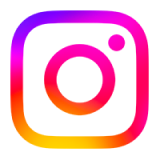
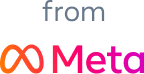

In [118]:
driver.page_source

In [119]:
driver.find_element("css selector", "div._aagw").click()

<html class="_9dls js-focus-visible _aa4c" data-js-focus-visible="" dir="ltr" lang="ko"><head><link data-default-icon="https://static.cdninstagram.com/rsrc.php/v3/yI/r/VsNE-OHk_8a.png" href="https://static.cdninstagram.com/rsrc.php/v3/yI/r/VsNE-OHk_8a.png" rel="icon" sizes="192x192"/><meta content="noarchive, noimageindex" name="robots"/><meta charset="utf-8"/><meta content="default" name="apple-mobile-web-app-status-bar-style"/><meta content="yes" name="mobile-web-app-capable"/><meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, viewport-fit=cover" id="viewport" name="viewport"/><meta content="#FFFFFF" name="theme-color"/><meta content="#000000" media="(prefers-color-scheme: dark)" name="theme-color"/><link href="https://static.cdninstagram.com/rsrc.php/v3/yR/r/lam-fZmwmvn.png" rel="apple-touch-icon" sizes="76x76"/><link href="https://static.cdninstagram.com/rsrc.php/v3/ys/r/aM-g435MtEX.png" rel="apple-touch-icon" sizes="120x120"/><link href="https://
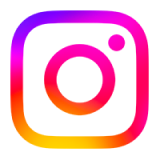
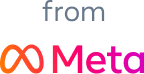

In [120]:
html=driver.page_source
soup=BeautifulSoup(html, "html.parser")
soup
#driver.find_element("css selector", "div._a9zr").click()

In [121]:
title = soup.select("div._a9zr h1")
title[0].text

'울릉도에서 먹은음식 중 젤 맛있었던 곳울릉도 여행 중 사막의 오아시스 같았던 곳다 만족스럽지 못했던 울릉도 음식점들 중 제일 맛있게 먹었음ㅋㅋ ⠀울릉도가 오징어로 유명하니 시켜본 오삼불고기 꿀맛이었고 확실히 냉동오징어가 아니라 야들야들함첨 먹어보는 따개비칼국수도 짱맛😍 따개비 첨 먹어봤는데 맛있더라공ㅋ국물 얼큰~~하이 부산오기전에 한그릇 더 먹고싶었는데 그노메 패키지 일정땜에 먹을날이 음슴..^^⠀울릉도 패키지는 진짜 비추입니더ㅋㅋ한번쯤 가더라도 꼭 자유로가세여...ㅎ⠀⠀⠀⠀#우성식당#따개비칼국수#따개비칼국수맛집#오삼불고기#오삼불고기맛집#울릉도우성식당#울릉도맛집#울릉도맛집추천#울릉도밥집#울릉도핫플#울릉도여행#울릉도여행코스#윤쏘울릉도'

In [122]:
#1)driver.get("사이트주소")
#2-1)driver.find_element('css selector', "추출 대상 셀렉터")
#2-2)driver.page_source
#3)BeautifulSoup()
#4)select, ...

In [128]:
prev_btn=driver.find_element("css selector", "body > div.x1n2onr6.xzkaem6 > div.x9f619.x1n2onr6.x1ja2u2z > div > div.x1uvtmcs.x4k7w5x.x1h91t0o.x1beo9mf.xaigb6o.x12ejxvf.x3igimt.xarpa2k.xedcshv.x1lytzrv.x1t2pt76.x7ja8zs.x1n2onr6.x1qrby5j.x1jfb8zj > div > div > div > div > div:nth-child(1) > div > div > div > button")
prev_btn.click()

In [149]:
def insta_func(word):
    url="https://www.instagram.com/explore/tags/" + word
    return url

In [150]:
word="제주도맛집"
url=insta_func(word)
driver.get(url)

In [154]:
first=driver.find_element("css selector","#mount_0_0_wS > div > div > div.x9f619.x1n2onr6.x1ja2u2z > div > div > div.x78zum5.xdt5ytf.x1t2pt76.x1n2onr6.x1ja2u2z.x10cihs4 > div.x9f619.xvbhtw8.x78zum5.x168nmei.x13lgxp2.x5pf9jr.xo71vjh.x1uhb9sk.x1plvlek.xryxfnj.x1c4vz4f.x2lah0s.xdt5ytf.xqjyukv.x1qjc9v5.x1oa3qoh.x1qughib > div.x1gryazu.xh8yej3.x10o80wk.x14k21rp.x17snn68.x6osk4m.x1porb0y > section > main > article > div > div > div > div:nth-child(1) > div:nth-child(1) > a > div._aagu > div._aagw")
first.click()

In [155]:
html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

<html class="_9dls js-focus-visible _aa4c" data-js-focus-visible="" dir="ltr" lang="ko"><head><link data-default-icon="https://static.cdninstagram.com/rsrc.php/v3/yI/r/VsNE-OHk_8a.png" href="https://static.cdninstagram.com/rsrc.php/v3/yI/r/VsNE-OHk_8a.png" rel="icon" sizes="192x192"/><meta content="noarchive, noimageindex" name="robots"/><meta charset="utf-8"/><meta content="default" name="apple-mobile-web-app-status-bar-style"/><meta content="yes" name="mobile-web-app-capable"/><meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, viewport-fit=cover" id="viewport" name="viewport"/><meta content="#FFFFFF" name="theme-color"/><meta content="#000000" media="(prefers-color-scheme: dark)" name="theme-color"/><link href="https://static.cdninstagram.com/rsrc.php/v3/yR/r/lam-fZmwmvn.png" rel="apple-touch-icon" sizes="76x76"/><link href="https://static.cdninstagram.com/rsrc.php/v3/ys/r/aM-g435MtEX.png" rel="apple-touch-icon" sizes="120x120"/><link href="https://
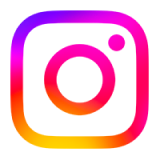
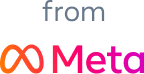

In [156]:
soup

In [161]:
title=soup.select('div._a9zr h1')
title[0].text

'📢제주에 놀러온다면 방문해야 하는 필수코스!황칠나무 및 각종 한약재로 고기를 삶고 육수를 낸정성 가득 들어간 매운갈비찜..😋한약재를 사용했지만 한약재 특유의 냄새를 잡아부담없이 먹을 수 있는 맛!!제주에서는 이미 유명한 현지인이 추천하는 찐맛집..❤다양한 메뉴로 입맛 까다로운 친구, 가족, 지인누구를 데려가도 칭찬받을 수 있는 추천 1순위 맛집!✔돼지매운갈비찜✔돼낙지(전복)매운갈비찜 (추천👍)(갈비+낙지+전복을 한 번에 맛볼 수 있는 메뉴)➥고등어구이 반마리(갈비찜 2인분 주문 기준)+계란찜+청국장 포함✔고등어정식➥제육볶음+공기밥+계란찜+청국장 포함✔옥돔정식➥제육볶음+공기밥+계란찜+청국장 포함✔간장갈비찜➥매운음식이 어려운 아이들을 위한 메뉴[모든 메뉴 포장가능]❗매주 화요일은 휴무❗🌷영업시간: 오전11:00 - 오후9시까지🌷예약&주문: 064-744-5543, 010-3698-8824🍀찾아오는길: 서귀포시 안덕면 녹차분재로59번길6#제주맛집 #제주도맛집 #제주맛집추천 #제주도맛집추천 #제주여행 #제주도여행 #오설록맛집 #신화월드맛집 #항공우주박물관맛집 #안덕면맛집 #서귀포맛집 #서귀포맛집추천 #서귀포갈비찜 #제주여행코스 #제주데이트코스 (광고)'